# ROC曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [5]:
import sys 
sys.path.append("C:\\Users\\Administrator\\Documents\\Python\\MachineLearning")

In [18]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores),0.01)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

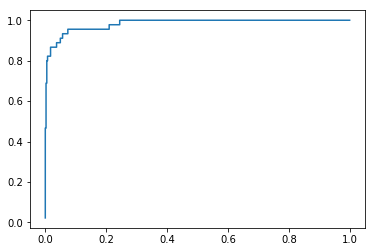

In [19]:
plt.plot(fprs, tprs)
plt.show()

### scikit-learn中的ROC

In [8]:
from sklearn.metrics import roc_curve

fprs2, tprs2, thresholds = roc_curve(y_test, decision_scores)

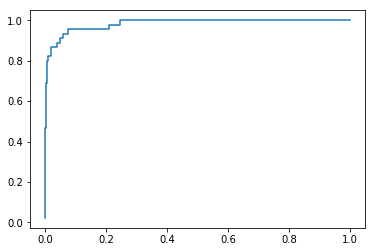

In [9]:
plt.plot(fprs2, tprs2)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

In [23]:
roc_auc_score(y_test, decision_scores)

0.9830452674897119